In [1]:
import pandas as pd
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

In [2]:
videos_df = pd.read_csv('USvideos.csv')
videos_df['publish_time'] = pd.to_datetime(videos_df['publish_time']).dt.tz_localize(None)
videos_df['trending_date'] = pd.to_datetime(videos_df['trending_date'], format='%y.%d.%m')
videos_df.info()
videos_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40949 non-null  object        
 1   trending_date           40949 non-null  datetime64[ns]
 2   title                   40949 non-null  object        
 3   channel_title           40949 non-null  object        
 4   category_id             40949 non-null  int64         
 5   publish_time            40949 non-null  datetime64[ns]
 6   tags                    40949 non-null  object        
 7   views                   40949 non-null  int64         
 8   likes                   40949 non-null  int64         
 9   dislikes                40949 non-null  int64         
 10  comment_count           40949 non-null  int64         
 11  thumbnail_link          40949 non-null  object        
 12  comments_disabled       40949 non-null  bool  

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18 01:00:06,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [3]:
fastest_tranding_df = videos_df[['title', 'publish_time', 'trending_date']]
fastest_tranding_df['time_diff'] = fastest_tranding_df['trending_date'] - fastest_tranding_df['publish_time'] + pd.Timedelta(days=1)
fastest_tranding_df = fastest_tranding_df.sort_values(by='time_diff').reset_index(drop=True)
fastest_tranding_df

<ipython-input-3-d1c9f9c38530>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fastest_tranding_df['time_diff'] = fastest_tranding_df['trending_date'] - fastest_tranding_df['publish_time'] + pd.Timedelta(days=1)


,title,publish_time,trending_date,time_diff
0,"iPhone X vs Pixel 2, three months later",2018-02-15 13:00:04,2018-02-15,0 days 10:59:56
1,ULTRA LIVE presents Ultra Music Festival 2018 ...,2018-03-24 07:55:21,2018-03-24,0 days 16:04:39
2,James Franco Audience Questions Monologue - SNL,2017-12-10 06:14:05,2017-12-10,0 days 17:45:55
3,Shawn Mendes: The Album,2018-04-26 06:02:51,2018-04-26,0 days 17:57:09
4,Natalie's 2nd Rap - SNL,2018-02-04 05:57:36,2018-02-04,0 days 18:02:24
...,...,...,...,...
40944,Kramer vs Kramer-Clou Scene,2008-04-05 18:22:40,2018-01-06,3563 days 05:37:20
40945,Kramer vs Kramer-Clou Scene,2008-04-05 18:22:40,2018-01-07,3564 days 05:37:20
40946,Kramer vs Kramer-Clou Scene,2008-04-05 18:22:40,2018-01-08,3565 days 05:37:20
40947,Kramer vs Kramer-Clou Scene,2008-04-05 18:22:40,2018-01-09,3566 days 05:37:20


In [4]:
fastest_tranding_20_df = fastest_tranding_df.head(20)
fastest_tranding_20_df['min_diff'] = fastest_tranding_20_df.apply(lambda row: round(row['time_diff'].total_seconds() / 60), axis=1)
fastest_tranding_20_df

<ipython-input-4-888a65b76eea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fastest_tranding_20_df['min_diff'] = fastest_tranding_20_df.apply(lambda row: round(row['time_diff'].total_seconds() / 60), axis=1)


,title,publish_time,trending_date,time_diff,min_diff
0,"iPhone X vs Pixel 2, three months later",2018-02-15 13:00:04,2018-02-15,0 days 10:59:56,660
1,ULTRA LIVE presents Ultra Music Festival 2018 ...,2018-03-24 07:55:21,2018-03-24,0 days 16:04:39,965
2,James Franco Audience Questions Monologue - SNL,2017-12-10 06:14:05,2017-12-10,0 days 17:45:55,1066
3,Shawn Mendes: The Album,2018-04-26 06:02:51,2018-04-26,0 days 17:57:09,1077
4,Natalie's 2nd Rap - SNL,2018-02-04 05:57:36,2018-02-04,0 days 18:02:24,1082
5,White House Christmas Cold Open - SNL,2017-12-03 05:46:28,2017-12-03,0 days 18:13:32,1094
6,Jessica Chastain Monologue - SNL,2018-01-21 05:44:30,2018-01-21,0 days 18:15:30,1096
7,Chance-giving Monologue - SNL,2017-11-19 05:43:25,2017-11-19,0 days 18:16:35,1097
8,Jimmy Interviews Cardi B,2017-12-21 05:25:00,2017-12-21,0 days 18:35:00,1115
9,Star Wars Whisper Challenge with Daisy Ridley,2017-11-29 05:06:35,2017-11-29,0 days 18:53:25,1133


<AxesSubplot:ylabel='title'>

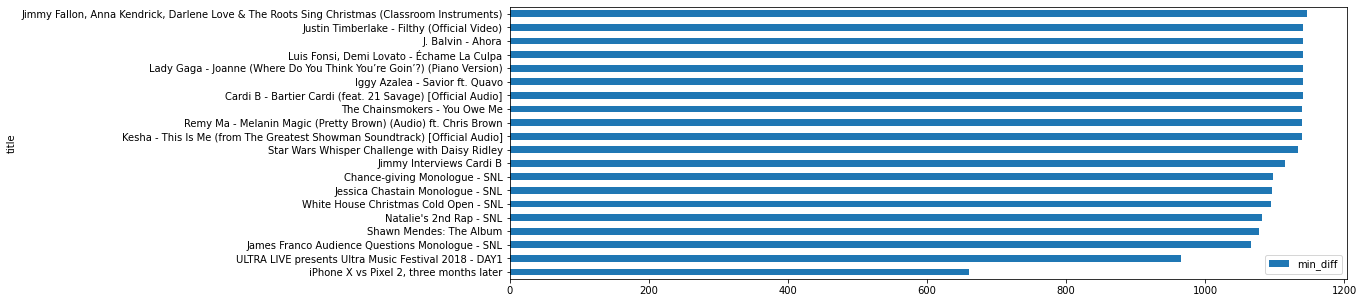

In [5]:
fastest_tranding_20_df.plot(x='title', y='min_diff', kind='barh')

На данном графике представлено время, за которое видео попадает в trending_date с момента размещения на сайте (в минутах). Выборка сделана для топ-20 по наименьшему времени с момента размещения до попадания в тренд. 
Так как не указано точное время попадания в тренд (только дата), произведено округление величин.
Вывод: Для топ-20 время продвижения Trendind, составляет от 11 часов. Среднее время - 18 часов

array([[<AxesSubplot:xlabel='views', ylabel='views'>,
        <AxesSubplot:xlabel='likes', ylabel='views'>,
        <AxesSubplot:xlabel='dislikes', ylabel='views'>,
        <AxesSubplot:xlabel='comment_count', ylabel='views'>],
       [<AxesSubplot:xlabel='views', ylabel='likes'>,
        <AxesSubplot:xlabel='likes', ylabel='likes'>,
        <AxesSubplot:xlabel='dislikes', ylabel='likes'>,
        <AxesSubplot:xlabel='comment_count', ylabel='likes'>],
       [<AxesSubplot:xlabel='views', ylabel='dislikes'>,
        <AxesSubplot:xlabel='likes', ylabel='dislikes'>,
        <AxesSubplot:xlabel='dislikes', ylabel='dislikes'>,
        <AxesSubplot:xlabel='comment_count', ylabel='dislikes'>],
       [<AxesSubplot:xlabel='views', ylabel='comment_count'>,
        <AxesSubplot:xlabel='likes', ylabel='comment_count'>,
        <AxesSubplot:xlabel='dislikes', ylabel='comment_count'>,
        <AxesSubplot:xlabel='comment_count', ylabel='comment_count'>]],
      dtype=object)

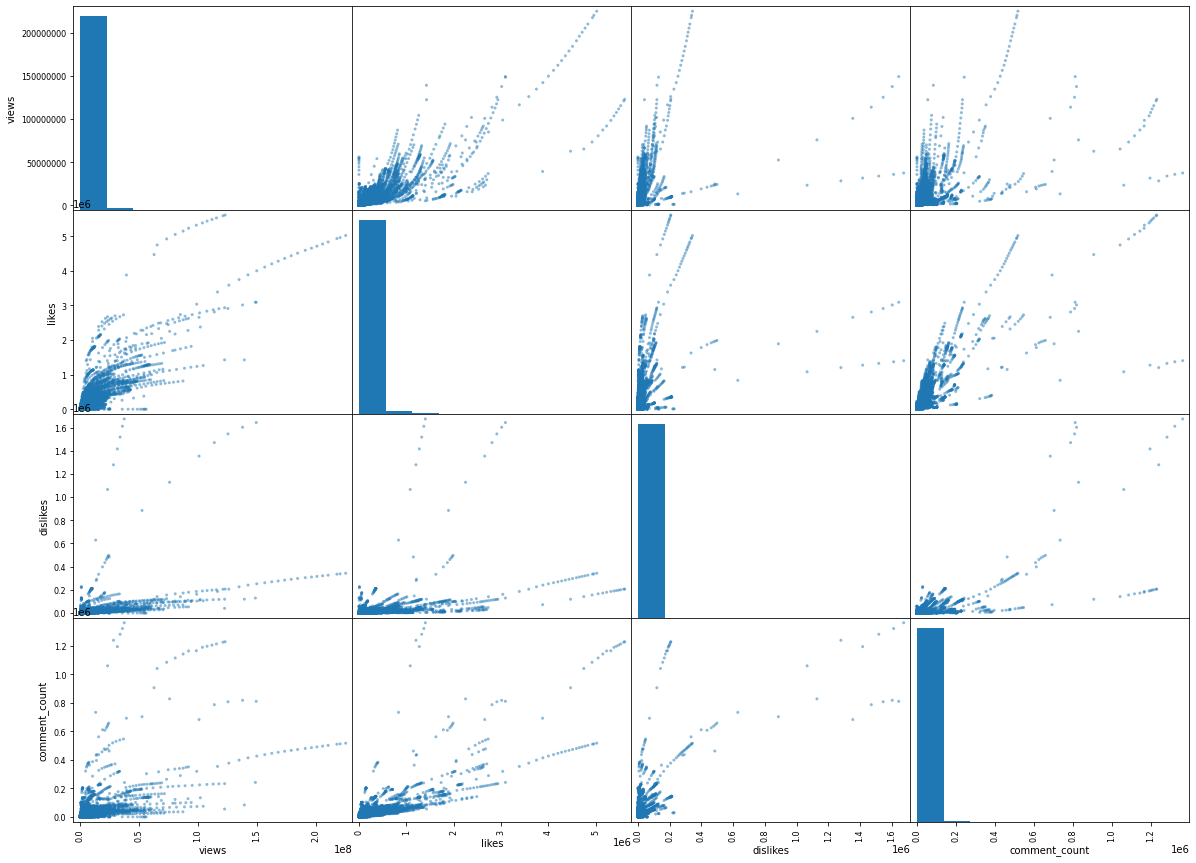

In [9]:
pd.plotting.scatter_matrix(videos_df[['views', 'likes', 'dislikes', 'comment_count']], figsize=(20, 15))

На графиках отражена корреляция количества просмотров к количеству положительных оценок (лайков), отрицательных оценок (дизлайков) и количеству комментариев.
1. Лучшая корреляция по отношению лайков / дезлайков. Чем больше положительных оценок, тем больше отрицательных.
2. Отношение количества просмотров / количество комментариев - корреляцию установить не представляется возможным.


In [23]:
channels_df = videos_df[['channel_title', 'views']]
channels_df['likes/dislikes'] = videos_df['likes'] / videos_df['dislikes']
channels_df

<ipython-input-23-6dceb67c8da0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channels_df['likes/dislikes'] = videos_df['likes'] / videos_df['dislikes']


,channel_title,views,likes/dislikes
0,CaseyNeistat,748374,19.395482
1,LastWeekTonight,2418783,15.812724
2,Rudy Mancuso,3191434,27.352126
3,Good Mythical Morning,343168,15.273273
4,nigahiga,2095731,66.483157
...,...,...,...
40944,AaronsAnimals,1685609,27.552347
40945,zefrank1,1064798,157.089005
40946,Brad Mondo,1066451,46.577519
40947,How It Should Have Ended,5660813,67.799368


In [40]:
channels_df = channels_df.groupby('channel_title').agg({'views':'sum', 'likes/dislikes':'mean'}).reset_index()
channels_df = channels_df.sort_values(by='views', ascending=False).reset_index(drop=True)
channels_df = channels_df[channels_df['likes/dislikes'] != np.inf].dropna()
channels_df

,channel_title,views,likes/dislikes
0,ChildishGambinoVEVO,3758488765,16.985294
1,ibighit,2235906679,128.328063
2,Dude Perfect,1870085178,47.021279
3,Marvel Entertainment,1808998971,84.701944
4,ArianaGrandeVevo,1576959172,43.790664
...,...,...,...
2126,Single Shot,2951,3.000000
2127,Cleveland Browns,2416,11.000000
2129,CHauserable,1807,2.000000
2130,Total Combat,1722,5.666667


In [55]:
top_15_channels_df = channels_df[:15]
top_15_channels_df

,channel_title,views,likes/dislikes
0,ChildishGambinoVEVO,3758488765,16.985294
1,ibighit,2235906679,128.328063
2,Dude Perfect,1870085178,47.021279
3,Marvel Entertainment,1808998971,84.701944
4,ArianaGrandeVevo,1576959172,43.790664
5,MalumaVEVO,1551515831,13.407116
6,jypentertainment,1486972132,41.400777
7,Sony Pictures Entertainment,1432374398,19.405942
8,FoxStarHindi,1238609854,26.386671
9,BeckyGVEVO,1182971286,11.915301


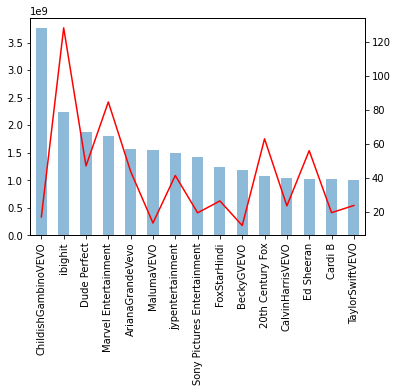

In [68]:
%matplotlib inline
from matplotlib import pyplot as plt

fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()

top_15_channels_df['views'].plot(kind='bar', stacked=True, ax=ax0, alpha=0.5)
top_15_channels_df['likes/dislikes'].plot(kind='line', secondary_y=True, ax=ax1, color='red')
plt.xticks(range(len(top_15_channels_df)), top_15_channels_df['channel_title'])
plt.show()
plt.close()

ТОП - 15 каналов по количеству просмотров (столбцы) и отношение количества положительных/отрицательных оценок к видео, размещённому на указанных каналах. 

Наибольшее количество просмотров у подкаста на канале ChildishGambinoVEVO, более 3,5 млрд просмотров. 

Наибольший процент положительных оценок у подкаста на каналах:
 ibight
 Marvel Entertainment
 20th Century Fox
 Eb Sheeran

Худшее соотношение положительных и отрицательных оценок:
 MalumaVEVO
 BeckyGVEVO

In [91]:
categories_df = videos_df[['category_id', 'views']].groupby('category_id').sum()
categories_df = categories_df.sort_values(by='views', ascending=False)
categories_df.info()
categories_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 10 to 43
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   views   16 non-null     int64
dtypes: int64(1)
memory usage: 256.0 bytes


,views
category_id,
10,40132892190
24,20604388195
1,7284156721
23,5117426208
22,4917191726
17,4404456673
26,4078545064
28,3487756816
20,2141218625


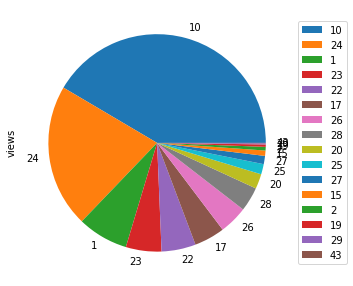

In [95]:
categories_df.plot.pie(y='views', figsize=(5, 5)).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Распределение по категориям видео. Наибольшее количество видео категории 10, затем категория 24, категория 1 и пр.